# Customer Churn Analytics
- The objective of this project is to analyze customer churn in a telecom company. Customer churn refers to the phenomenon where customers switch from one service provider to another or cancel their subscription altogether. By analyzing customer churn patterns, we aim to identify the factors that contribute to churn and develop strategies to mitigate it.

# 1. Data Preparation - (EDA & Feature Engineering - Data Analytics )

In [1]:
# EDA
import numpy as np
import pandas as pd 

# Data Visualizations
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
telecom_data = pd.read_csv(r"E:\Datasets\Telco-Customer-Churn.csv")
telecom_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
telecom_data.shape

(7043, 21)

In [5]:
telecom_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
for col in telecom_data.columns:
    print("column:{} -Unique Values: {}".format(col,telecom_data[col].unique()))

column:customerID -Unique Values: ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
column:gender -Unique Values: ['Female' 'Male']
column:SeniorCitizen -Unique Values: [0 1]
column:Partner -Unique Values: ['Yes' 'No']
column:Dependents -Unique Values: ['No' 'Yes']
column:tenure -Unique Values: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
column:PhoneService -Unique Values: ['No' 'Yes']
column:MultipleLines -Unique Values: ['No phone service' 'No' 'Yes']
column:InternetService -Unique Values: ['DSL' 'Fiber optic' 'No']
column:OnlineSecurity -Unique Values: ['No' 'Yes' 'No internet service']
column:OnlineBackup -Unique Values: ['Yes' 'No' 'No internet service']
column:DeviceProtection -Unique Values: ['No' 'Yes' 'No internet service']
column:TechSupport -Unique Values: ['No' '

In [7]:
telecom_data.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

In [8]:
telecom_data.TotalCharges = pd.to_numeric(telecom_data.TotalCharges, errors='coerce')

In [9]:
telecom_data.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [10]:
telecom_data.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


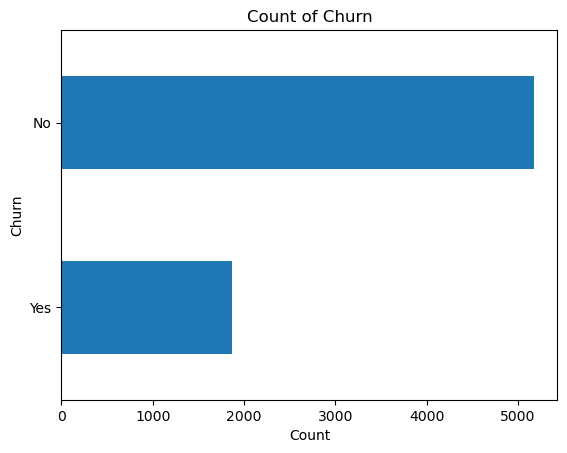

In [11]:
telecom_data['Churn'].value_counts().plot(kind='barh')
plt.xlabel("Count")
plt.ylabel("Churn")
plt.title("Count of Churn")
plt.gca().invert_yaxis()  # Invert y-axis to have 'No Churn' on top
plt.show()

In [12]:
telecom_data['Churn'].value_counts()/len(telecom_data)

Churn
No     0.73463
Yes    0.26537
Name: count, dtype: float64

In [13]:
telecom_data['Churn'].value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

In [14]:
telecom_data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [15]:
telecom = telecom_data.copy()

In [16]:
telecom.isna().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [17]:
telecom.loc[telecom['TotalCharges'].isna()==True]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [18]:
telecom.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [19]:
telecom.isna().sum()/len(telecom)

customerID          0.000000
gender              0.000000
SeniorCitizen       0.000000
Partner             0.000000
Dependents          0.000000
tenure              0.000000
PhoneService        0.000000
MultipleLines       0.000000
InternetService     0.000000
OnlineSecurity      0.000000
OnlineBackup        0.000000
DeviceProtection    0.000000
TechSupport         0.000000
StreamingTV         0.000000
StreamingMovies     0.000000
Contract            0.000000
PaperlessBilling    0.000000
PaymentMethod       0.000000
MonthlyCharges      0.000000
TotalCharges        0.001562
Churn               0.000000
dtype: float64

In [20]:
telecom.dropna(how = 'any', inplace = True)

In [21]:
print(telecom['tenure'].max())

72


In [22]:
# Define the bins and labels
bins = [0, 12, 24, 36, 48, 60, 72]
labels = ['1 - 12', '13 - 24', '25 - 36', '37 - 48', '49 - 60', '61 - 72']

# Create the tenure_group column
telecom['tenure_group'] = pd.cut(telecom['tenure'], bins=bins, labels=labels, right=False)

In [23]:
telecom['tenure_group'].value_counts()

tenure_group
1 - 12     2058
61 - 72    1121
13 - 24    1047
25 - 36     876
49 - 60     820
37 - 48     748
Name: count, dtype: int64

In [24]:
telecom['tenure_group'].value_counts()/len(telecom)

tenure_group
1 - 12     0.292662
61 - 72    0.159414
13 - 24    0.148891
25 - 36    0.124573
49 - 60    0.116610
37 - 48    0.106371
Name: count, dtype: float64

In [25]:
telecom.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,1 - 12
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,No,No,One year,No,Mailed check,56.95,1889.50,No,25 - 36
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1 - 12
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,37 - 48
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1 - 12


In [26]:
telecom.drop(columns = ['customerID','tenure'], axis=1, inplace = True)
telecom.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,1 - 12
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No,25 - 36
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1 - 12
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,37 - 48
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1 - 12


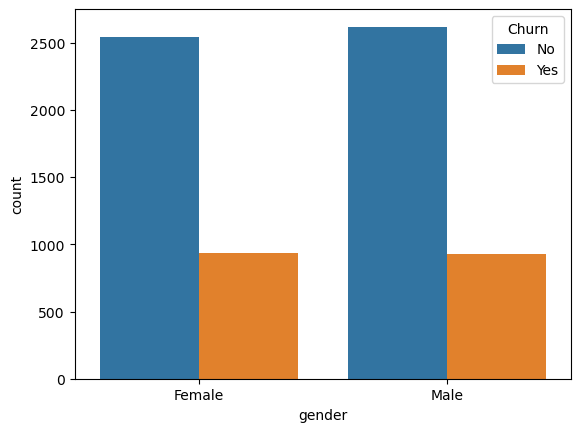

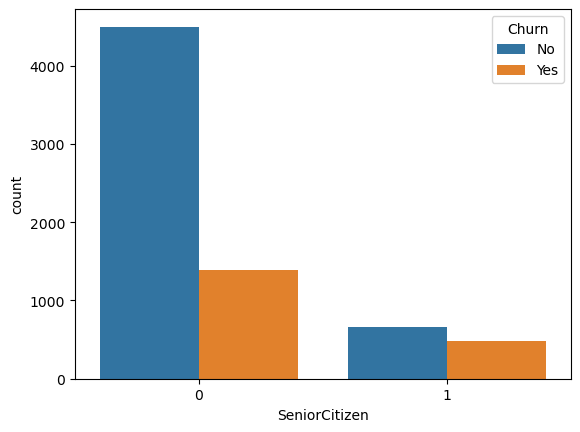

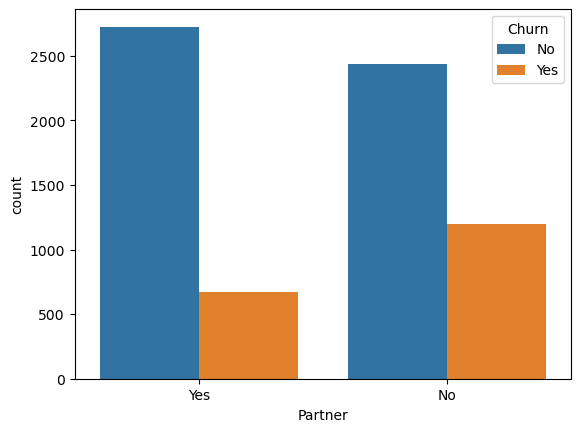

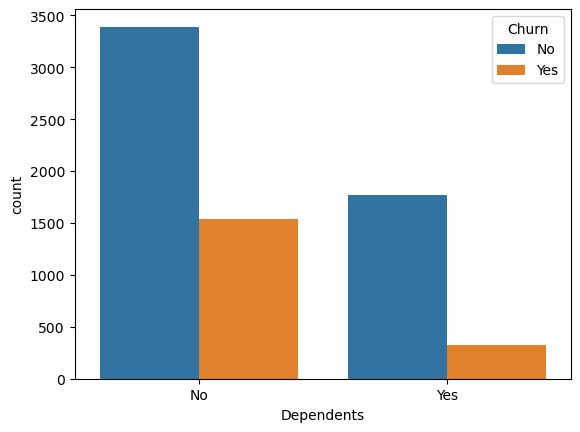

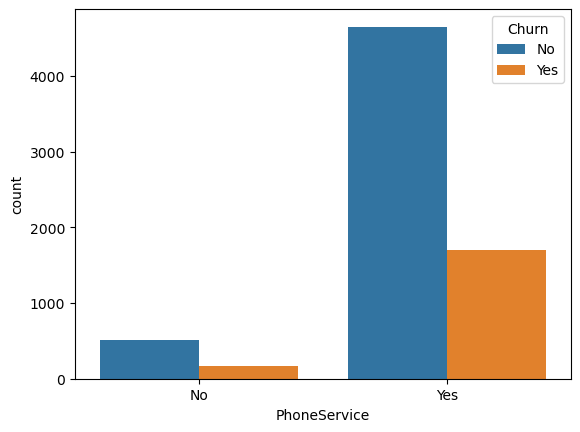

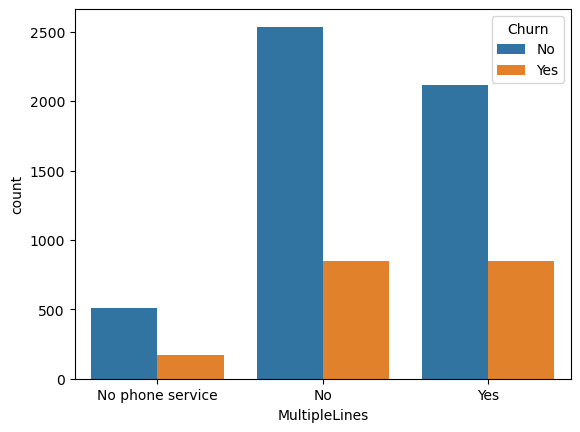

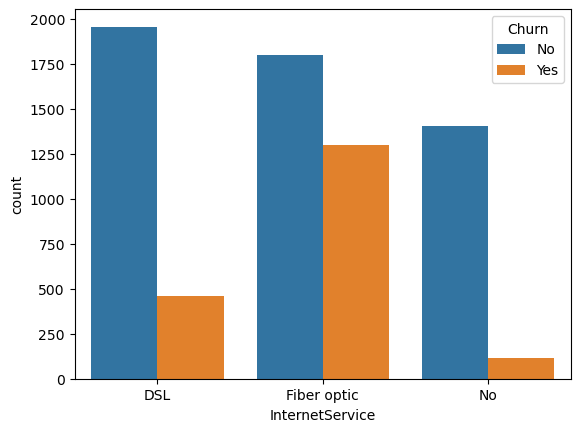

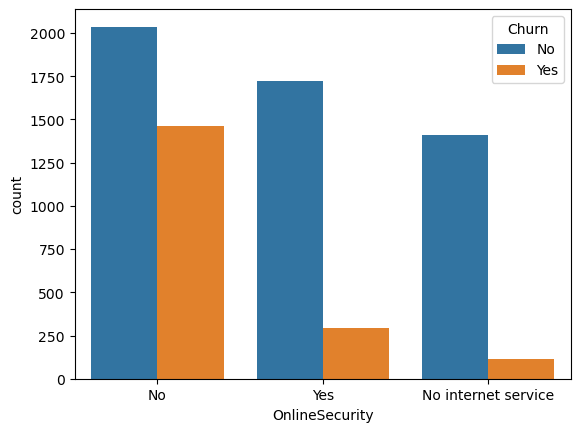

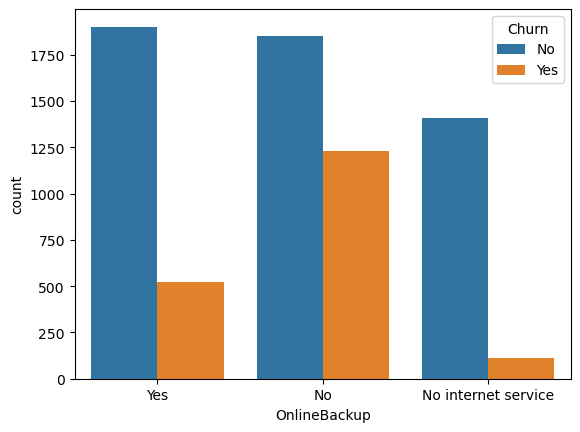

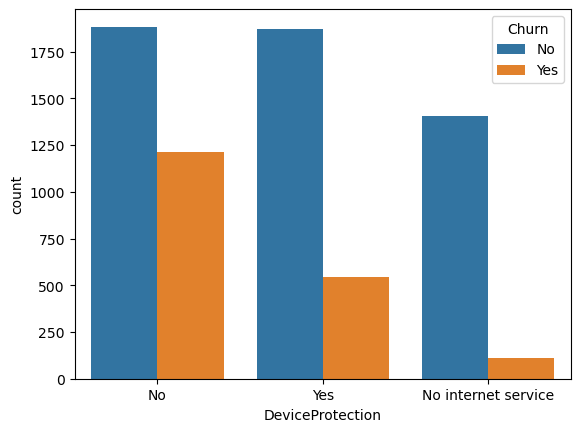

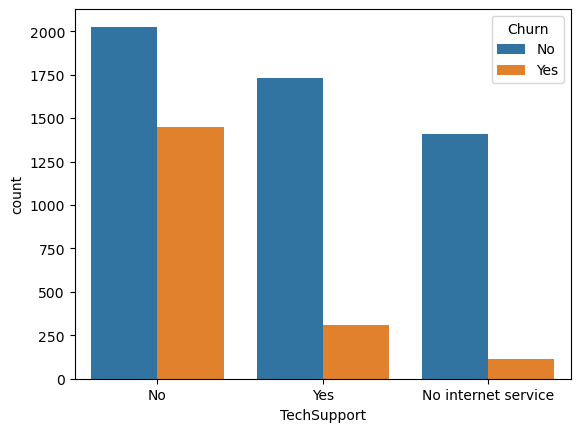

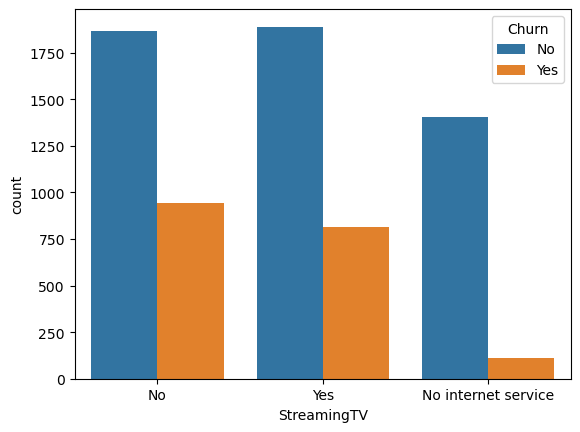

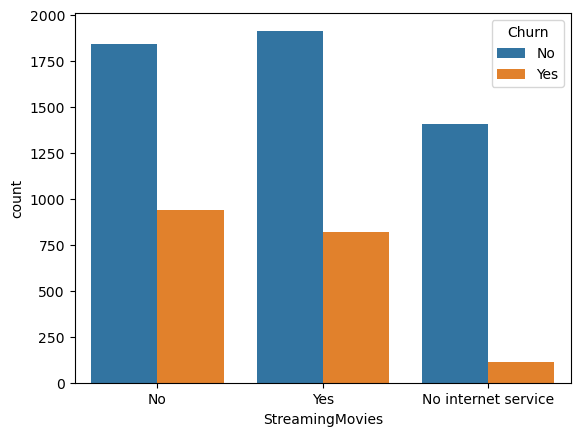

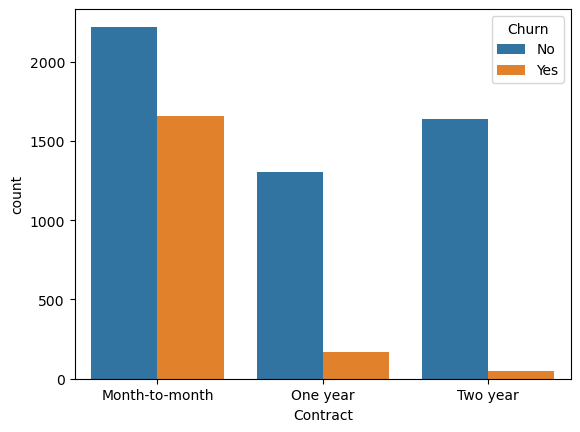

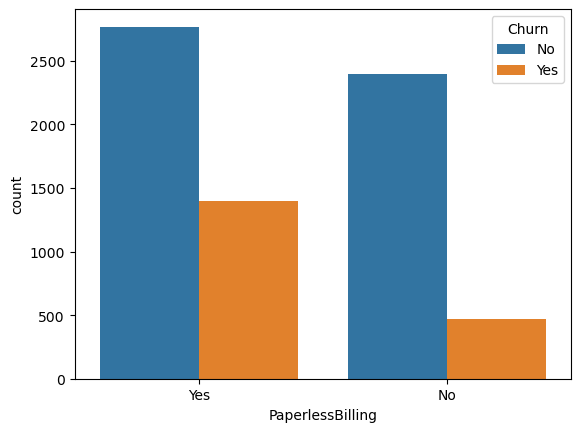

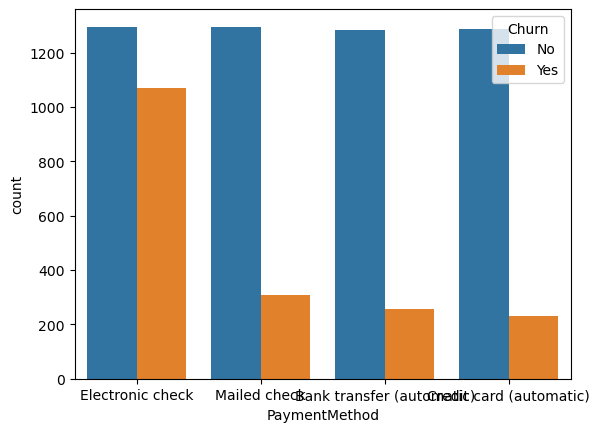

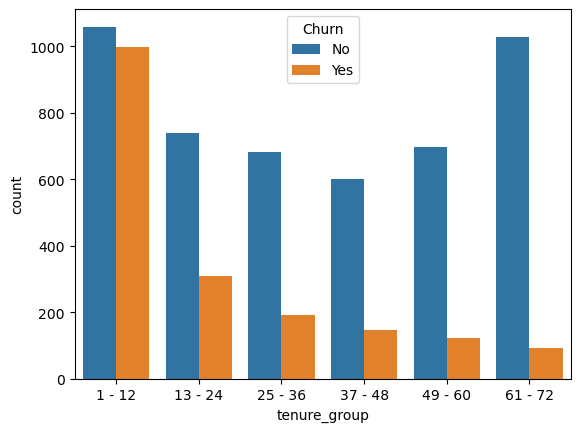

In [27]:
for i, predictor in enumerate(telecom.drop(columns=['Churn', 'TotalCharges', 'MonthlyCharges'])):
    plt.figure(i)
    sns.countplot(data=telecom, x=predictor, hue='Churn')

In [28]:
telecom['churn'] = np.where(telecom.Churn == 'Yes',1,0)

In [29]:
telecom.sample(3)

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group,churn
400,Female,0,No,No,Yes,No,No,No internet service,No internet service,No internet service,...,No internet service,No internet service,One year,No,Bank transfer (automatic),19.75,624.15,No,25 - 36,0
6671,Female,0,Yes,No,Yes,No,Fiber optic,No,Yes,No,...,Yes,Yes,Two year,Yes,Mailed check,100.05,6034.85,No,49 - 60,0
4988,Female,0,Yes,No,Yes,No,No,No internet service,No internet service,No internet service,...,No internet service,No internet service,One year,No,Mailed check,19.20,459.60,No,25 - 36,0


In [30]:
telecom.dtypes

gender                object
SeniorCitizen          int64
Partner               object
Dependents            object
PhoneService          object
MultipleLines         object
InternetService       object
OnlineSecurity        object
OnlineBackup          object
DeviceProtection      object
TechSupport           object
StreamingTV           object
StreamingMovies       object
Contract              object
PaperlessBilling      object
PaymentMethod         object
MonthlyCharges       float64
TotalCharges         float64
Churn                 object
tenure_group        category
churn                  int32
dtype: object

In [31]:
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()

le

LabelEncoder()

In [32]:
category=['gender','SeniorCitizen', 'tenure_group' ,'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod',  'Churn',]

telecom[category] = telecom[category].apply(le.fit_transform)

In [33]:
telecom.sample(3)

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group,churn
2550,0,0,1,1,1,0,2,1,1,1,...,1,1,2,0,3,20.05,1090.10,0,4,0
6321,0,0,1,0,1,0,2,1,1,1,...,1,1,0,0,0,19.65,655.85,1,2,1
3717,1,0,0,0,1,0,0,0,0,2,...,0,0,0,0,0,48.95,1323.70,0,2,0


<Axes: >

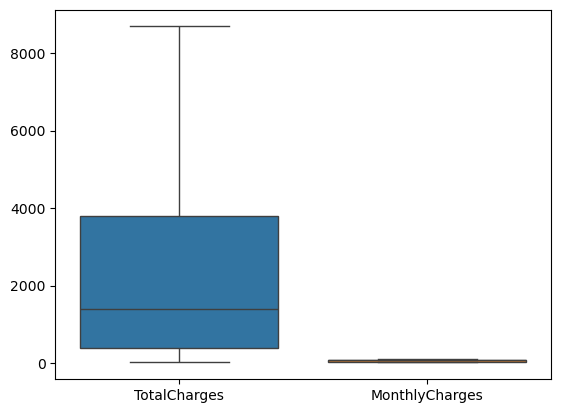

In [34]:
sns.boxplot(data=telecom[['TotalCharges', 'MonthlyCharges']])

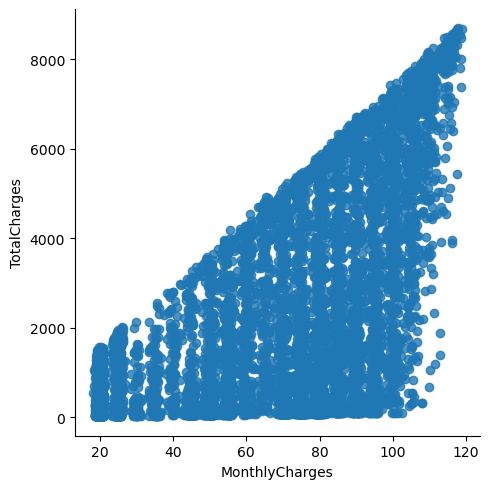

In [35]:
sns.lmplot(data=telecom, x='MonthlyCharges', y='TotalCharges', fit_reg=False)

Text(0.5, 1.0, 'Monthly charges by churn')

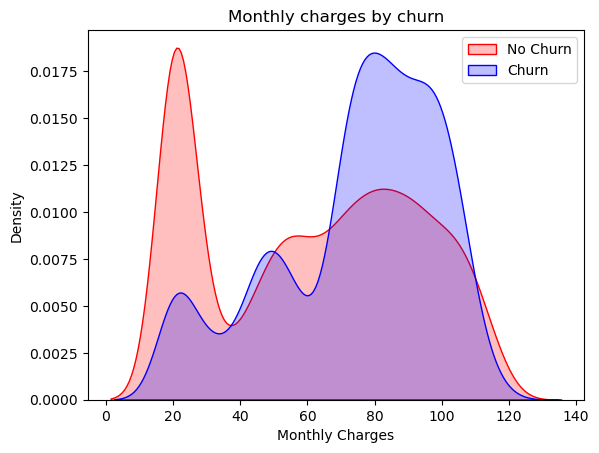

In [36]:
# kernel density estimate (KDE) plot.
Mth = sns.kdeplot(telecom.MonthlyCharges[(telecom["Churn"] == 0) ],
                color="Red", shade = True)
Mth = sns.kdeplot(telecom.MonthlyCharges[(telecom["Churn"] == 1) ],
                ax =Mth, color="Blue", shade= True)
Mth.legend(["No Churn","Churn"],loc='upper right')
Mth.set_ylabel('Density')
Mth.set_xlabel('Monthly Charges')
Mth.set_title('Monthly charges by churn')

Text(0.5, 1.0, 'Total charges by churn')

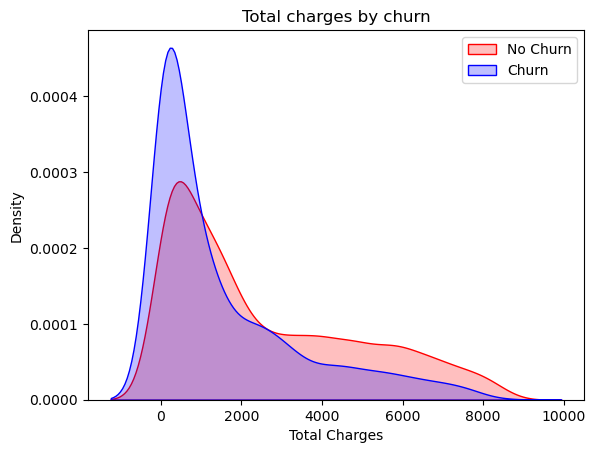

In [37]:
Tot = sns.kdeplot(telecom.TotalCharges[(telecom["Churn"] == 0) ],
                color="Red", shade = True)
Tot = sns.kdeplot(telecom.TotalCharges[(telecom["Churn"] == 1) ],
                ax =Tot, color="Blue", shade= True)
Tot.legend(["No Churn","Churn"],loc='upper right')
Tot.set_ylabel('Density')
Tot.set_xlabel('Total Charges')
Tot.set_title('Total charges by churn')

<Axes: >

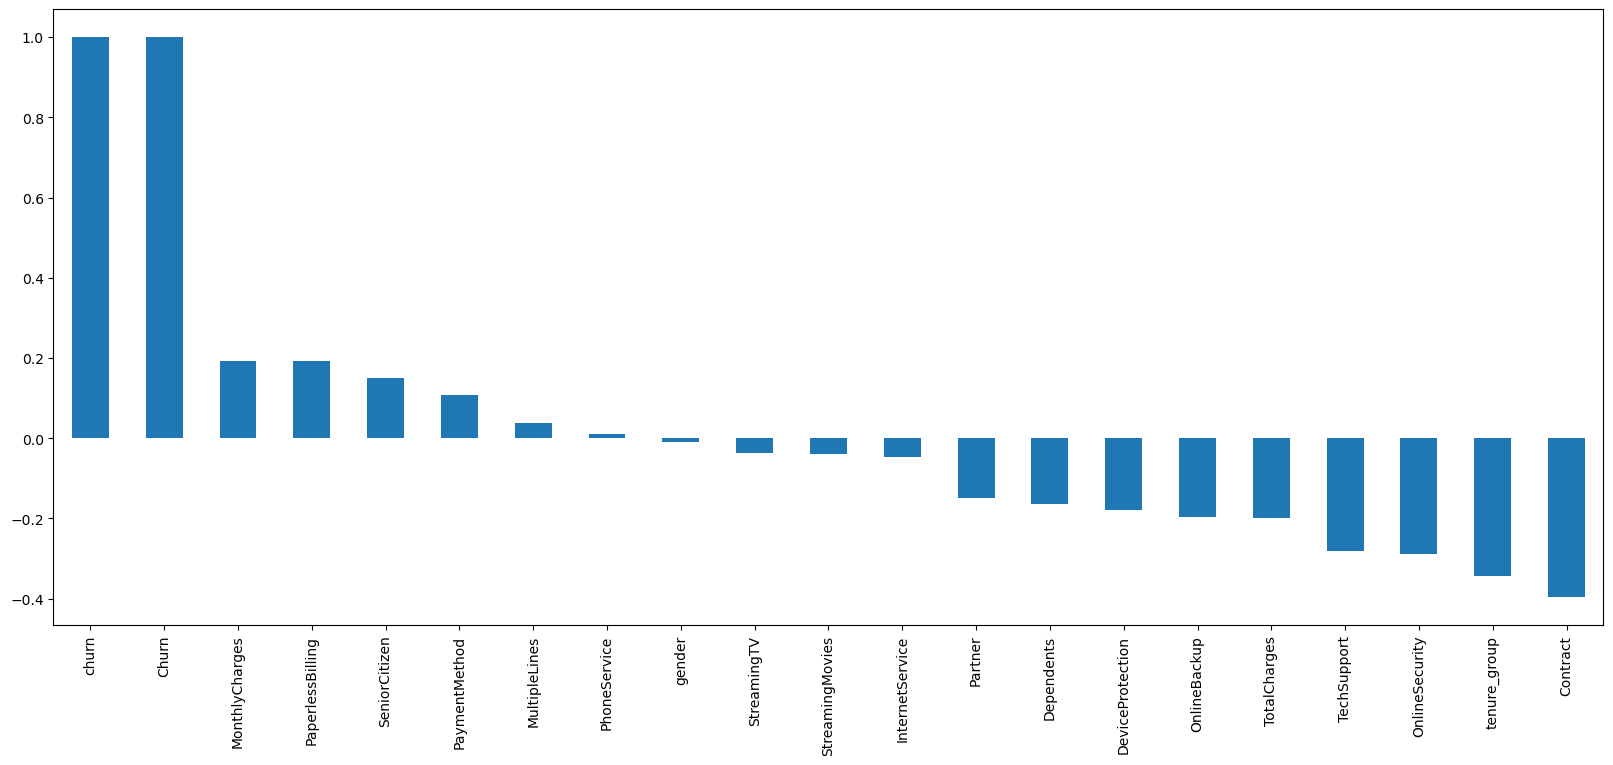

In [38]:
plt.figure(figsize=(20,8))
telecom.corr()['Churn'].sort_values(ascending = False).plot(kind='bar')

<Axes: >

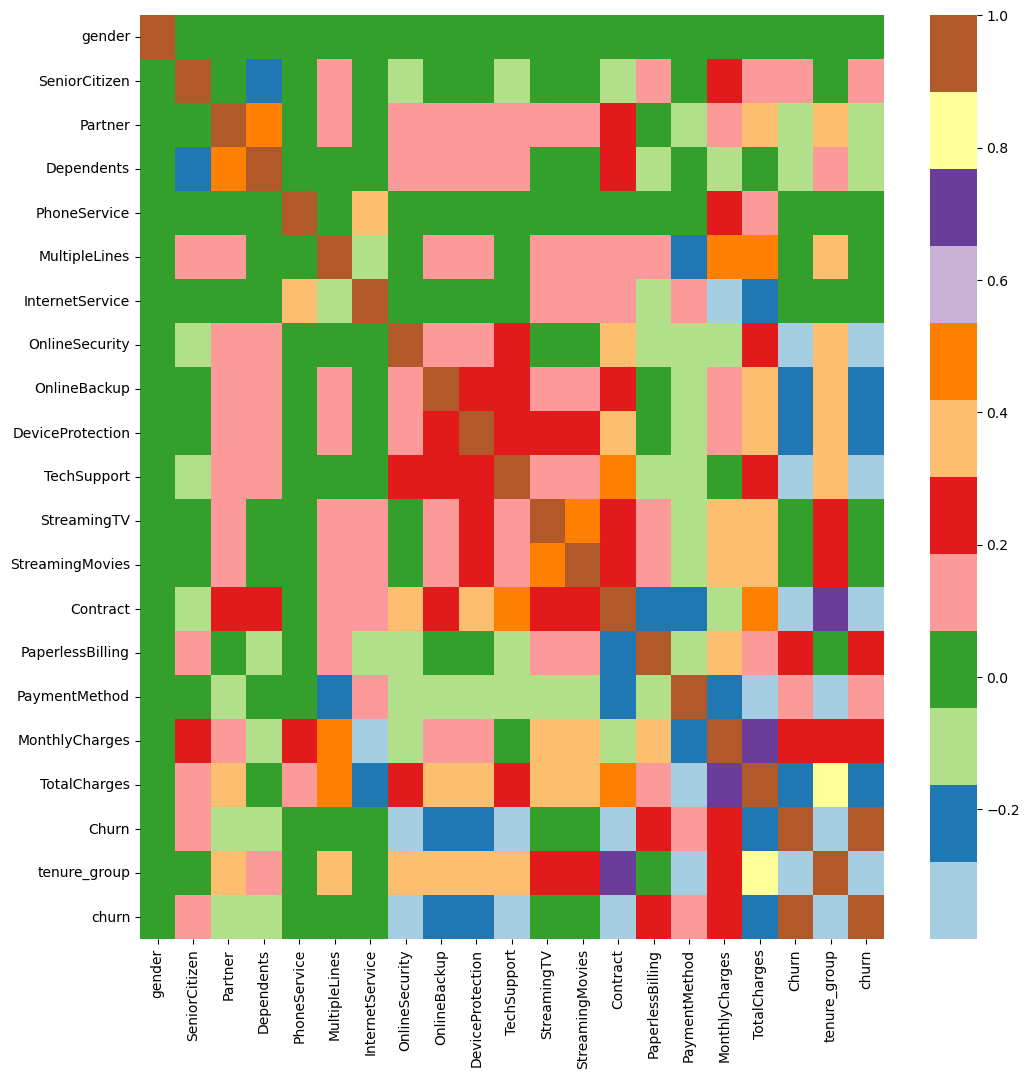

In [39]:
plt.figure(figsize=(12,12))
sns.heatmap(telecom.corr(), cmap="Paired")

In [40]:
new_df1_target0=telecom.loc[telecom["Churn"]==0]
new_df1_target1=telecom.loc[telecom["Churn"]==1]

In [41]:
def uniplot(df,col,title,hue =None):
    
    sns.set_style('whitegrid')
    sns.set_context('talk')
    plt.rcParams["axes.labelsize"] = 20
    plt.rcParams['axes.titlesize'] = 22
    plt.rcParams['axes.titlepad'] = 30
    
    
    temp = pd.Series(data = hue)
    fig, ax = plt.subplots()
    width = len(df[col].unique()) + 7 + 4*len(temp.unique())
    fig.set_size_inches(width , 8)
    plt.xticks(rotation=45)
    plt.yscale('log')
    plt.title(title)
    ax = sns.countplot(data = df, x= col, order=df[col].value_counts().index,hue = hue,palette='bright') 
        
    plt.show()

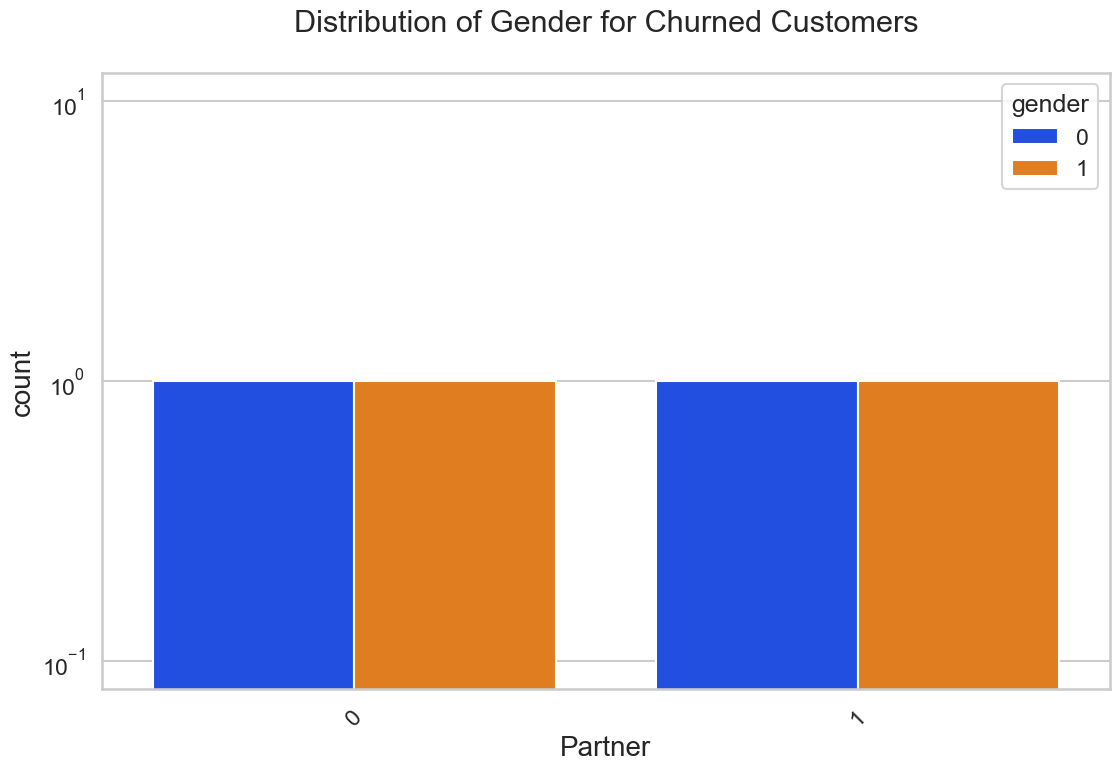

In [42]:
uniplot(new_df1_target1,col='Partner',title='Distribution of Gender for Churned Customers',hue='gender')

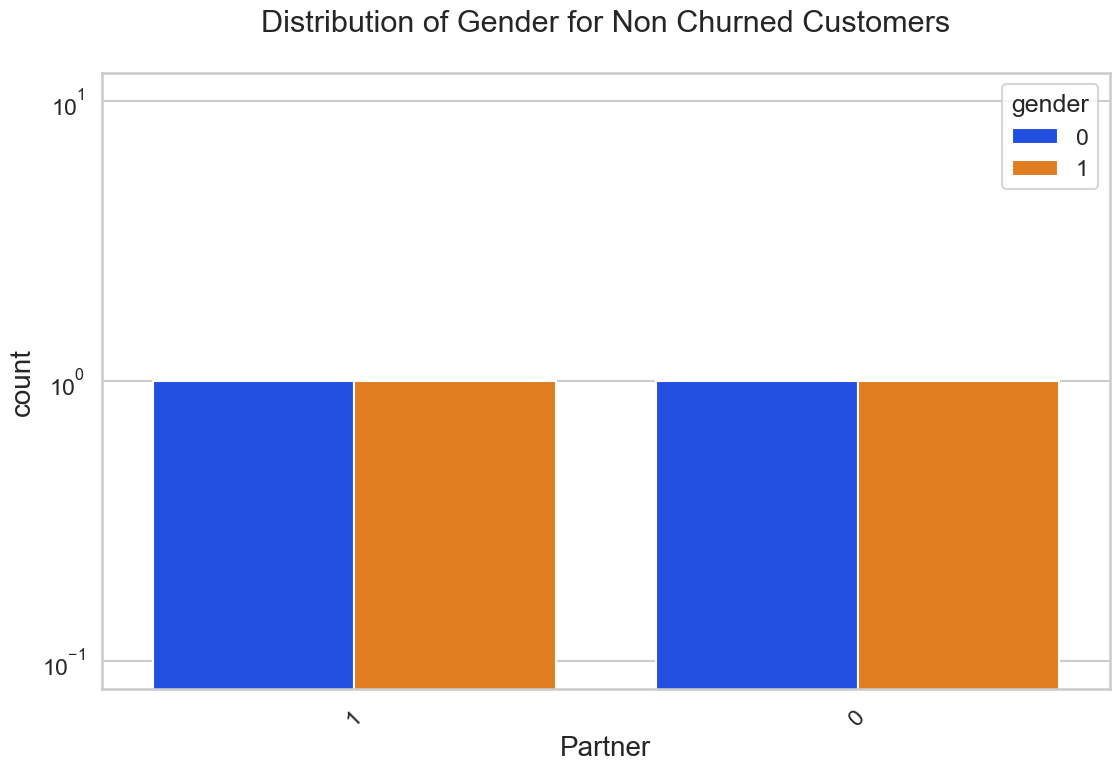

In [43]:
uniplot(new_df1_target0,col='Partner',title='Distribution of Gender for Non Churned Customers',hue='gender')

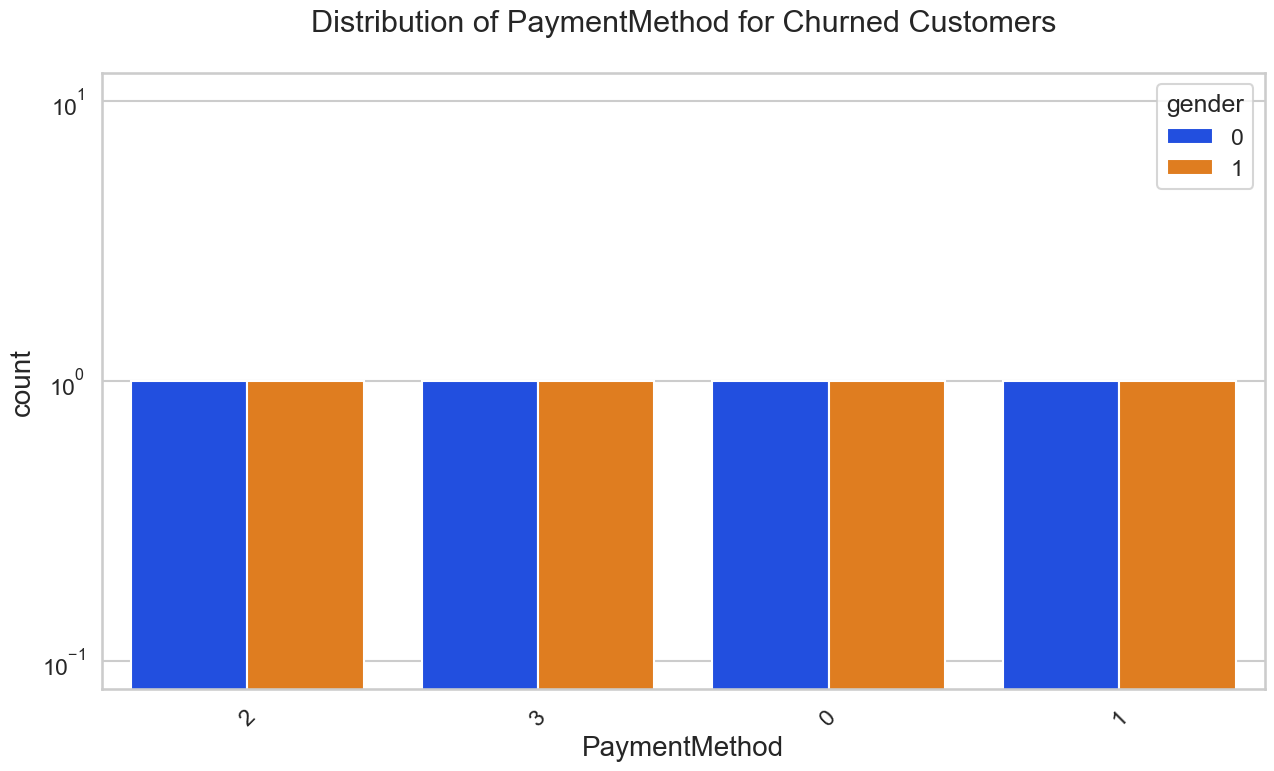

In [44]:
uniplot(new_df1_target1,col='PaymentMethod',title='Distribution of PaymentMethod for Churned Customers',hue='gender')

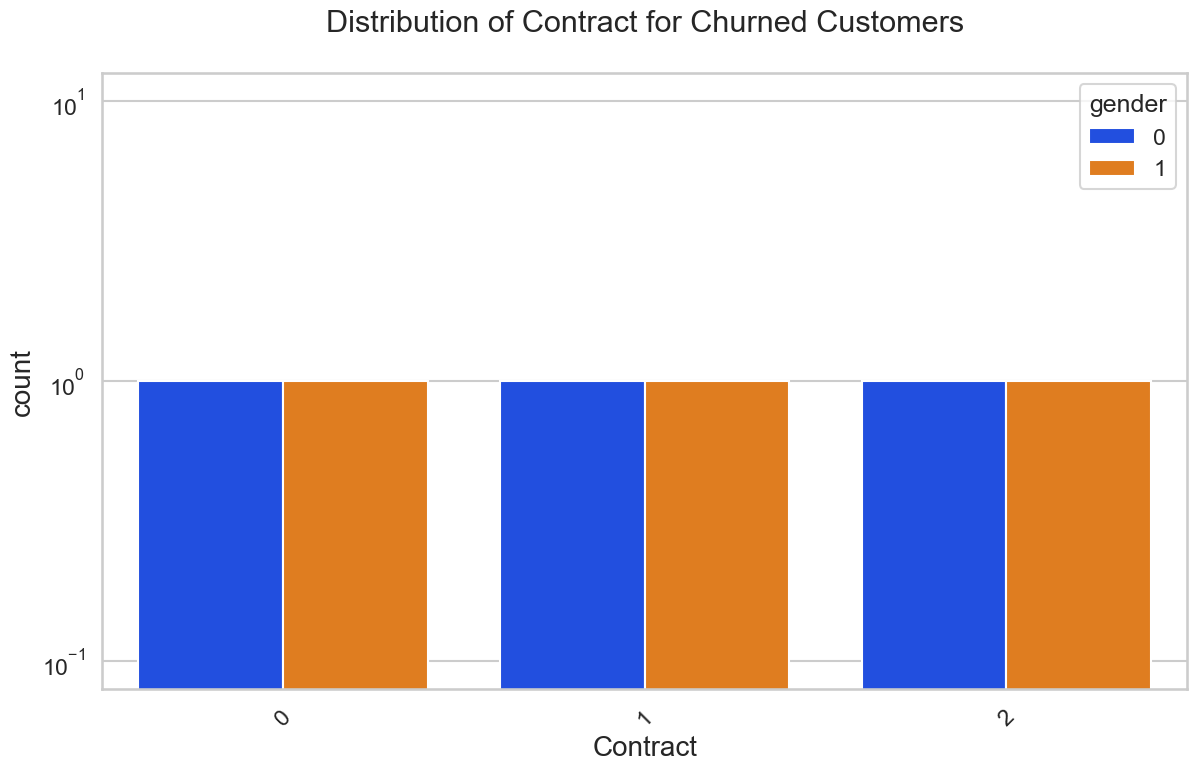

In [45]:
uniplot(new_df1_target1,col='Contract',title='Distribution of Contract for Churned Customers',hue='gender')

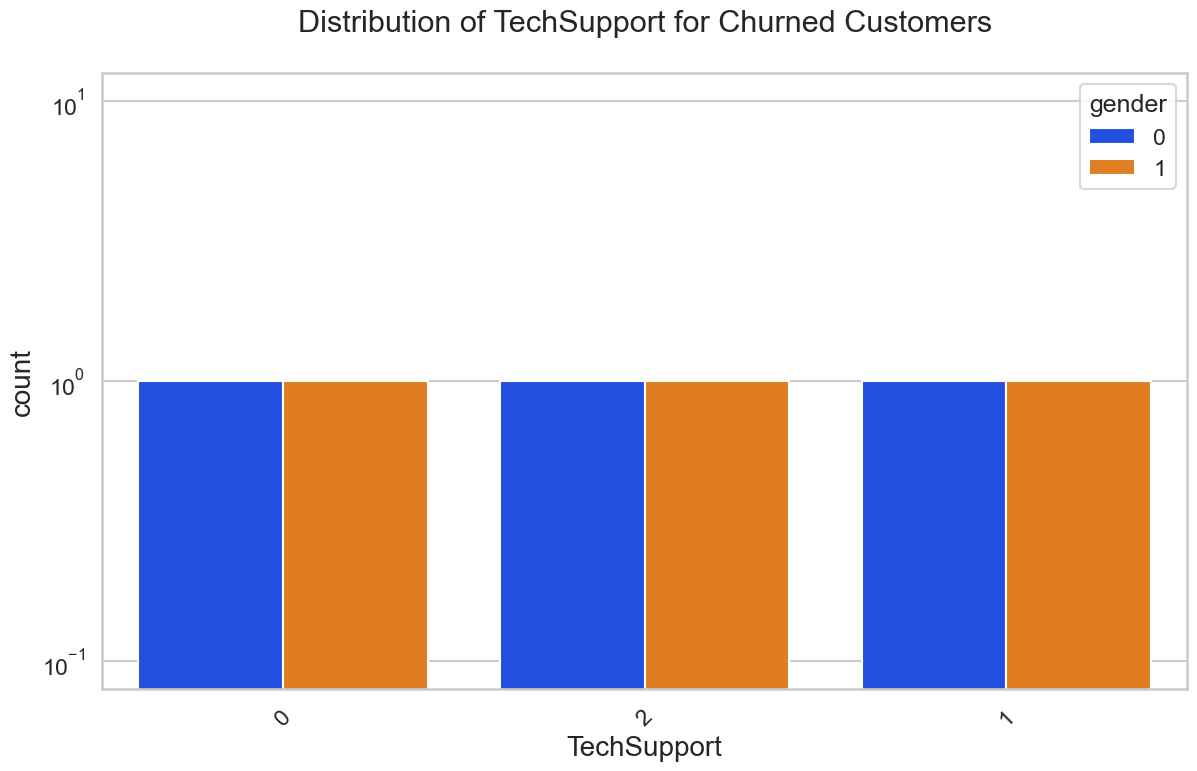

In [46]:
uniplot(new_df1_target1,col='TechSupport',title='Distribution of TechSupport for Churned Customers',hue='gender')

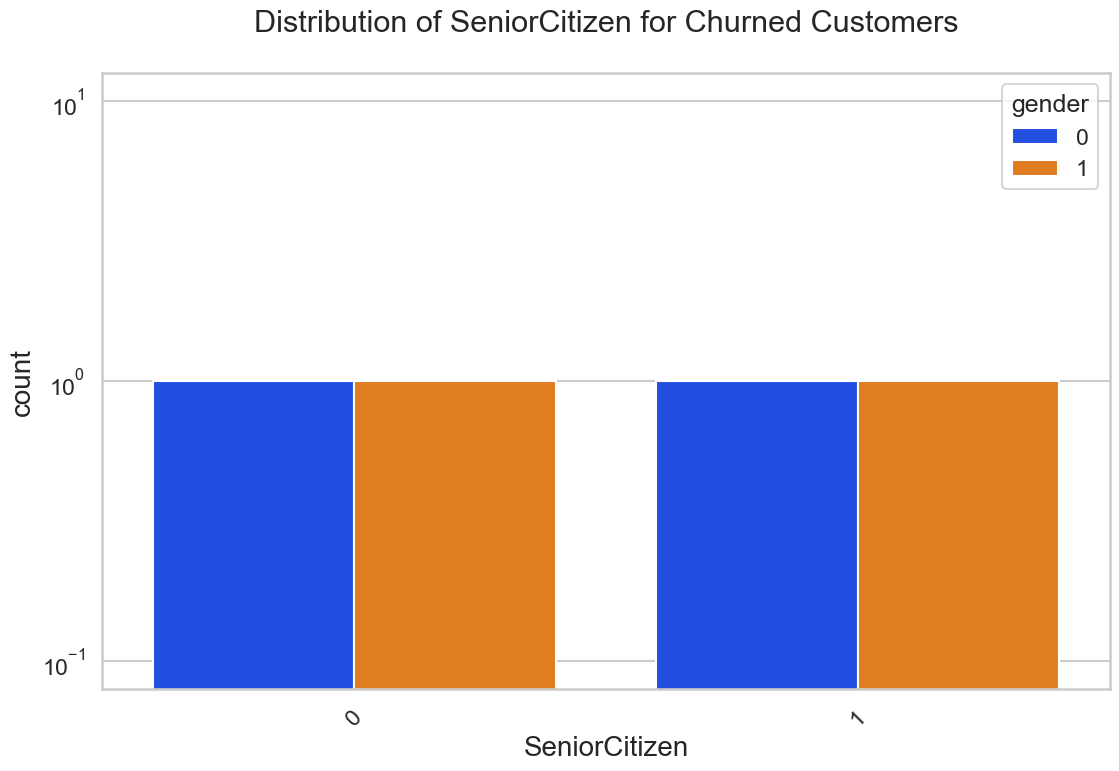

In [47]:
uniplot(new_df1_target1,col='SeniorCitizen',title='Distribution of SeniorCitizen for Churned Customers',hue='gender')

In [48]:
X=telecom.drop('Churn',axis=1)
y=telecom['Churn']

In [49]:
X

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,tenure_group,churn
0,0,0,1,0,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0,0
1,1,0,0,0,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,2,0
2,1,0,0,0,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,0,1
3,1,0,0,0,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,3,0
4,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,1,2,0,2,0,2,2,2,2,1,1,3,84.80,1990.50,2,0
7039,0,0,1,1,1,2,1,0,2,2,0,2,2,1,1,1,103.20,7362.90,6,0
7040,0,0,1,1,0,1,0,2,0,0,0,0,0,0,1,2,29.60,346.45,0,0
7041,1,1,1,0,1,2,1,0,0,0,0,0,0,0,1,3,74.40,306.60,0,1


In [50]:
y

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn, Length: 7032, dtype: int32

In [51]:
telecom['Churn'].value_counts()/len(telecom) #data is highly imbalancing

Churn
0    0.734215
1    0.265785
Name: count, dtype: float64

In [52]:
from sklearn.model_selection  import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [53]:
print('Traing data shape')

print(X_train.shape)
print(y_train.shape)




print('Testing Data shape')

print(X_test.shape)
print(y_test.shape)

Traing data shape
(5625, 20)
(5625,)
Testing Data shape
(1407, 20)
(1407,)


In [54]:
print(y_test.value_counts())

print(y_train.value_counts())

Churn
0    1033
1     374
Name: count, dtype: int64
Churn
0    4130
1    1495
Name: count, dtype: int64


In [55]:
from sklearn.tree import DecisionTreeClassifier
tele_DTC = DecisionTreeClassifier(criterion = "gini", random_state = 100, max_depth=6, min_samples_leaf=8 )
tele_DTC.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=8, random_state=100)

- In a Jupyter environment, please rerun this cell to show the HTML representation or trust the notebook.
- On GitHub, the HTML representation is unable to render, please try loading this page with nbviewer.org.

In [56]:
tele_DTC.score(X_test,y_test)

1.0

In [57]:
y_pred=tele_DTC.predict(X_test)
y_pred[:10]


array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0])

In [58]:
print(y_test[:10])

2481    0
6784    0
6125    1
3052    0
4099    0
3223    0
3774    0
3469    0
3420    0
1196    0
Name: Churn, dtype: int32


In [59]:
# If you're using pandas
X = X.drop(columns=['churn'])

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
tele_DTC.fit(X_train, y_train)
print("New accuracy:", tele_DTC.score(X_test, y_test))

New accuracy: 0.7619047619047619


In [61]:
from sklearn.metrics import classification_report

y_pred = tele_DTC.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.83      0.84      1033
           1       0.55      0.56      0.56       374

    accuracy                           0.76      1407
   macro avg       0.70      0.70      0.70      1407
weighted avg       0.76      0.76      0.76      1407



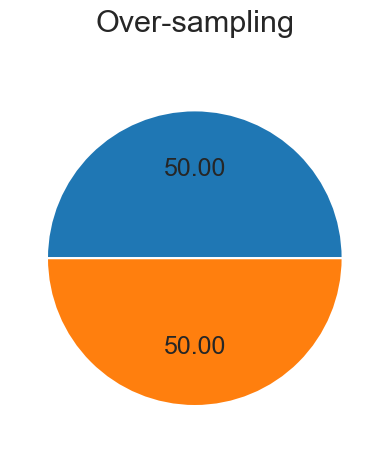

In [62]:
from imblearn.over_sampling import SMOTE

smote=SMOTE()

X_ovs,y_ovs=smote.fit_resample(X,y)



fig, oversp = plt.subplots()
oversp.pie( y_ovs.value_counts(), autopct='%.2f')
oversp.set_title("Over-sampling")
plt.show()

In [63]:
Xr_train,Xr_test,yr_train,yr_test=train_test_split(X_ovs, y_ovs,test_size=0.2,random_state=42)

In [64]:
from sklearn.linear_model  import LogisticRegression

model_lr=LogisticRegression(max_iter=1000)
model_lr.fit(Xr_train,yr_train)

LogisticRegression(max_iter=1000)

- In a Jupyter environment, please rerun this cell to show the HTML representation or trust the notebook.
- On GitHub, the HTML representation is unable to render, please try loading this page with nbviewer.org.

In [65]:
y_pred=model_lr.predict(Xr_test)
y_pred[:10]

array([1, 0, 0, 1, 0, 1, 1, 0, 1, 0])

In [66]:
model_lr.score(Xr_test,yr_test)

0.8049370764762827

In [67]:
from sklearn.metrics import accuracy_score, classification_report


report = classification_report(y_pred, yr_test, labels=[0, 1])

print(report)

              precision    recall  f1-score   support

           0       0.77      0.83      0.80       960
           1       0.84      0.78      0.81      1106

    accuracy                           0.80      2066
   macro avg       0.81      0.81      0.80      2066
weighted avg       0.81      0.80      0.81      2066



In [68]:
from sklearn.metrics import confusion_matrix
confusion_matrix(yr_test,y_pred)

array([[797, 240],
       [163, 866]], dtype=int64)

In [69]:
from sklearn.tree import DecisionTreeClassifier

model_dtc=DecisionTreeClassifier(criterion = "gini",random_state = 100,max_depth=6, min_samples_leaf=8)

model_dtc.fit(Xr_train,yr_train)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=8, random_state=100)

- In a Jupyter environment, please rerun this cell to show the HTML representation or trust the notebook.
- On GitHub, the HTML representation is unable to render, please try loading this page with nbviewer.org.

In [70]:
y_pred=model_dtc.predict(Xr_test)
y_pred[:10]

array([1, 0, 0, 1, 0, 1, 1, 0, 1, 0])

In [71]:
yr_test[:10]

4139    1
1692    0
2692    0
7704    1
321     0
9752    1
39      1
3813    0
7396    1
2613    0
Name: Churn, dtype: int32

In [72]:
model_dtc.score(Xr_test,yr_test)

0.7991287512100678

In [73]:
print(classification_report(yr_test, y_pred, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.82      0.77      0.79      1037
           1       0.78      0.83      0.80      1029

    accuracy                           0.80      2066
   macro avg       0.80      0.80      0.80      2066
weighted avg       0.80      0.80      0.80      2066



In [74]:
confusion_matrix(yr_test,y_pred)

array([[795, 242],
       [173, 856]], dtype=int64)

In [75]:
from sklearn.ensemble import RandomForestClassifier

model_rfc=RandomForestClassifier(n_estimators=100, random_state = 100,max_depth=6, min_samples_leaf=8,class_weight='balanced')

model_rfc.fit(Xr_train,yr_train)

RandomForestClassifier(class_weight='balanced', max_depth=6, min_samples_leaf=8,
                       random_state=100)

- In a Jupyter environment, please rerun this cell to show the HTML representation or trust the notebook.
- On GitHub, the HTML representation is unable to render, please try loading this page with nbviewer.org.

In [76]:
y_pred=model_rfc.predict(Xr_test)
y_pred[:10]

array([1, 0, 0, 1, 0, 1, 1, 0, 1, 0])

In [77]:
yr_test[:10]

4139    1
1692    0
2692    0
7704    1
321     0
9752    1
39      1
3813    0
7396    1
2613    0
Name: Churn, dtype: int32

In [78]:
model_rfc.score(Xr_test,yr_test)

0.8213939980638916

In [79]:
report_rfc=classification_report(y_pred,yr_test)
print(report_rfc)

              precision    recall  f1-score   support

           0       0.78      0.85      0.81       952
           1       0.86      0.80      0.83      1114

    accuracy                           0.82      2066
   macro avg       0.82      0.82      0.82      2066
weighted avg       0.82      0.82      0.82      2066



In [80]:
confusion_matrix(yr_test,y_pred)

array([[810, 227],
       [142, 887]], dtype=int64)

In [81]:
from sklearn.ensemble import  AdaBoostClassifier
model_abc=AdaBoostClassifier(n_estimators=100)
model_abc.fit(Xr_train,yr_train)

AdaBoostClassifier(n_estimators=100)

- In a Jupyter environment, please rerun this cell to show the HTML representation or trust the notebook.
- On GitHub, the HTML representation is unable to render, please try loading this page with nbviewer.org.

In [82]:
y_pred=model_abc.predict(Xr_test)
print(classification_report(y_pred,yr_test))

              precision    recall  f1-score   support

           0       0.80      0.85      0.83       971
           1       0.86      0.81      0.84      1095

    accuracy                           0.83      2066
   macro avg       0.83      0.83      0.83      2066
weighted avg       0.83      0.83      0.83      2066



In [83]:
confusion_matrix(yr_test,y_pred)

array([[830, 207],
       [141, 888]], dtype=int64)

In [84]:
from sklearn.ensemble import GradientBoostingClassifier
model_gbc=GradientBoostingClassifier()
model_gbc

GradientBoostingClassifier()

- In a Jupyter environment, please rerun this cell to show the HTML representation or trust the notebook.
- On GitHub, the HTML representation is unable to render, please try loading this page with nbviewer.org.

In [85]:
model_gbc.fit(Xr_train,yr_train)

GradientBoostingClassifier()

- In a Jupyter environment, please rerun this cell to show the HTML representation or trust the notebook.
- On GitHub, the HTML representation is unable to render, please try loading this page with nbviewer.org.

In [86]:
y_pred_gbc=model_gbc.predict(Xr_test)
y_pred_gbc[:10]

array([1, 0, 0, 1, 0, 1, 1, 0, 1, 0])

In [87]:
yr_test[:10]

4139    1
1692    0
2692    0
7704    1
321     0
9752    1
39      1
3813    0
7396    1
2613    0
Name: Churn, dtype: int32

In [88]:
print(classification_report(y_pred_gbc,yr_test))

              precision    recall  f1-score   support

           0       0.80      0.85      0.82       966
           1       0.86      0.81      0.83      1100

    accuracy                           0.83      2066
   macro avg       0.83      0.83      0.83      2066
weighted avg       0.83      0.83      0.83      2066



In [89]:
confusion_matrix(yr_test,y_pred)

array([[830, 207],
       [141, 888]], dtype=int64)

In [90]:
from xgboost import XGBClassifier

model_xgb=XGBClassifier(class_weight={0:1, 1:2})

model_xgb

XGBClassifier(base_score=None, booster=None, callbacks=None,
              class_weight={0: 1, 1: 2}, colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=None, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, feature_weights=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None, ...)

- In a Jupyter environment, please rerun this cell to show the HTML representation or trust the notebook.
- On GitHub, the HTML representation is unable to render, please try loading this page with nbviewer.org.

In [91]:
model_xgb.fit(Xr_train,yr_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              class_weight={0: 1, 1: 2}, colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=None, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, feature_weights=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None, ...)

- In a Jupyter environment, please rerun this cell to show the HTML representation or trust the notebook.
- On GitHub, the HTML representation is unable to render, please try loading this page with nbviewer.org.

In [92]:
y_pred=model_xgb.predict(Xr_test)
y_pred[:10]

array([1, 0, 0, 1, 0, 1, 1, 0, 1, 0])

In [93]:
yr_test[:10]

4139    1
1692    0
2692    0
7704    1
321     0
9752    1
39      1
3813    0
7396    1
2613    0
Name: Churn, dtype: int32

In [94]:
print(classification_report(y_pred,yr_test))

              precision    recall  f1-score   support

           0       0.84      0.85      0.85      1026
           1       0.85      0.84      0.85      1040

    accuracy                           0.85      2066
   macro avg       0.85      0.85      0.85      2066
weighted avg       0.85      0.85      0.85      2066



In [95]:
from sklearn.metrics import confusion_matrix

# Assuming y_pred and y_test are your predicted and true labels respectively
cm = confusion_matrix(yr_test, y_pred)

print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[872 165]
 [154 875]]


In [96]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import GradientBoostingClassifier
import time

# Define your GradientBoostingClassifier and param_dist
model = GradientBoostingClassifier()
param_dist = {
    'learning_rate': [0.1, 0.5, 1.0],
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],  # Example: Adding max_depth parameter
    'min_samples_split': [2, 5, 10]  # Example: Adding min_samples_split parameter
}

# Create RandomizedSearchCV object with fewer iterations
random_search = RandomizedSearchCV(estimator=model, param_distributions=param_dist, n_iter=5, cv=10, scoring='accuracy', random_state=42)

# Start the timer
start_time = time.time()

# Fit the RandomizedSearchCV object
random_search.fit(Xr_train, yr_train)

# Stop the timer
end_time = time.time()

# Calculate the total time taken
total_time = end_time - start_time

print("RandomizedSearchCV took {:.2f} seconds to complete.".format(total_time))

# Get the best parameters
best_params = random_search.best_params_
print("Best Parameters:", best_params)

RandomizedSearchCV took 70.54 seconds to complete.
Best Parameters: {'n_estimators': 100, 'min_samples_split': 5, 'max_depth': 7, 'learning_rate': 0.1}


In [97]:
from sklearn.ensemble import GradientBoostingClassifier

# Define the best hyperparameters obtained from GridSearchCV
best_params = {
   'n_estimators': 100, 'min_samples_split':5 , 'max_depth': 7, 'learning_rate': 0.1
    
    
    
}

# Create Gradient Boosting Classifier with the best hyperparameters
final_gb_classifier = GradientBoostingClassifier(**best_params)

# Train the final model on the entire training data
final_gb_classifier.fit(Xr_train, yr_train)

GradientBoostingClassifier(max_depth=7, min_samples_split=5)

- In a Jupyter environment, please rerun this cell to show the HTML representation or trust the notebook.
- On GitHub, the HTML representation is unable to render, please try loading this page with nbviewer.org.

In [98]:
from sklearn.model_selection import cross_val_score

# trained model with tuned hyperparameters
# X_train and y_train are your training data
# cv=10 indicates 10-fold cross-validation
cv_scores = cross_val_score(final_gb_classifier, Xr_train, yr_train, cv=10, scoring='accuracy')

# Print the cross-validation scores
print("Cross-validation scores:", cv_scores)
print("Mean CV score:", cv_scores.mean())

Cross-validation scores: [0.83656174 0.86440678 0.82808717 0.85472155 0.84503632 0.84866828
 0.82808717 0.83656174 0.82687651 0.86924939]
Mean CV score: 0.8438256658595641


In [99]:
y_pred=final_gb_classifier.predict(Xr_test)
y_pred[:10]

array([1, 0, 0, 1, 0, 1, 1, 0, 1, 0])

In [100]:
yr_test[:10]

4139    1
1692    0
2692    0
7704    1
321     0
9752    1
39      1
3813    0
7396    1
2613    0
Name: Churn, dtype: int32

In [101]:
print(classification_report(y_pred,yr_test))

              precision    recall  f1-score   support

           0       0.83      0.85      0.84      1016
           1       0.85      0.84      0.84      1050

    accuracy                           0.84      2066
   macro avg       0.84      0.84      0.84      2066
weighted avg       0.84      0.84      0.84      2066



In [102]:
confusion_matrix(y_pred,yr_test)

array([[865, 151],
       [172, 878]], dtype=int64)

In [103]:
import os 
import pickle
from sklearn.ensemble import GradientBoostingClassifier

# Change directory if needed
# os.chdir(r'')

# Assuming final_gb_classifier is your trained model
# Define and train Gradient Boosting Classifier
best_params = {
    'n_estimators': 100,
    'min_samples_split': 5,
    'max_depth': 7,
    'learning_rate': 0.1
}

final_gb_classifier = GradientBoostingClassifier(**best_params)

# Train the final model on the entire training data (assuming Xr_train and yr_train are defined)
final_gb_classifier.fit(X_train, y_train)

# Dumping the model to a file
with open('final_gb_classifier.pkl', 'wb') as file:
    pickle.dump(final_gb_classifier, file)

# Load the saved model
with open('final_gb_classifier.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

In [104]:
import pickle
import pandas as pd

# Load the saved model from the pickle file
with open('final_gb_classifier.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

# Prepare your own data for testing
# Create a DataFrame with your feature data
your_features = pd.DataFrame({
    'gender': [1, 0, 0, 0, 0],
    'SeniorCitizen': [0, 0, 0, 0, 0],
    'Partner': [0, 0, 0, 1, 1],
    'Dependents': [0, 0, 0, 0, 1],
    'PhoneService': [1, 0, 1, 1, 1],
    'MultipleLines': [0, 0, 0, 2, 2],
    'InternetService': [1, 0, 1, 1, 0],
    'OnlineSecurity': [0, 0, 0, 2, 2],
    'OnlineBackup': [0, 0, 1, 2, 2],
    'DeviceProtection': [0, 0, 0, 0, 2],
    'TechSupport': [0, 0, 0, 2, 2],
    'StreamingTV': [0, 1, 0, 0, 0],
    'StreamingMovies': [0, 1, 0, 0, 0],
    'Contract': [2, 0, 0, 1, 2],
    'PaperlessBilling': [0, 1, 0, 0, 0],
    'PaymentMethod': [1, 1, 1, 0, 0],
    'MonthlyCharges': [90.407734, 58.273891, 74.379767, 108.55, 64.35],
    'TotalCharges': [707.535237, 3264.466697, 1146.937795, 5610.7, 1558.65],
    'tenure_group': [0, 4, 1, 4, 2]
})

# Make predictions using the loaded model on your own data
predictions = loaded_model.predict(your_features)

# Print the predictions
print("Predictions:", predictions)


Predictions: [0 0 0 1 0]
